# **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a single image, and later apply the result to a video stream (really just a series of images). Check out the video clip "P0_example1.mp4" (also contained in this repository) to see what the output should look like. 

Let's have a look at our first image called 'solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to bring up an interactive matplotlib window displaying the image.

**Note:** you can zoom in and explore the image within the interactive matplotlib window.  If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the lines in the image, and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="laneLines_thirdPass.jpg" width="480" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output image should look like this (more or less) after line detection </p> 
 </figcaption>
</figure>

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

This image is:  <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


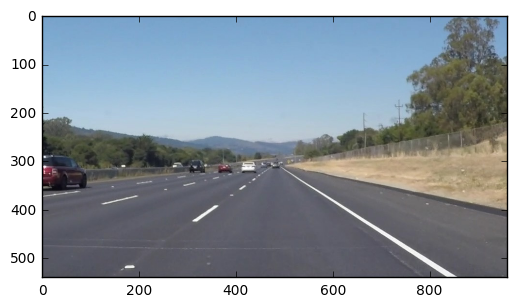

In [2]:
#reading in an image
image = mpimg.imread('solidWhiteRight.jpg')
#printing out some stats and plotting
print('This image is: ',type(image), 'with dimesions:', image.shape)
plt.imshow(image)

In [35]:
# ASSUMPTION img is the first argument to the transformation function
def run_pipeline(fns, fns_args, initial_img):
    imgs = [initial_img]
    for fn, fn_args in zip(fns, fns_args):
        img = fn(imgs[-1], *fn_args)
        imgs.append(img)
        
    return imgs

def visualize_pipeline(fig, imgs):
    # plot imgs
    n = len(imgs)
    cols = 2
    rows = n // cols
    if n % cols != 0:
        rows += 1
    print('# rows = {}, # cols = {}'.format(rows, cols))
    for i, img in enumerate(imgs):
        plt.subplot(rows, cols, i+1)
        plt.title(i+1)
        img_dims = len(img.shape)
        if img_dims < 3:
            plt.imshow(img, cmap='Greys_r')
        else:
            plt.imshow(img)

In [36]:
import math

def identity(img):
    return np.copy(img)

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold, aperture_size=3, l2_gradient=False):
    return cv2.Canny(img, low_threshold, high_threshold, apertureSize=aperture_size, L2gradient=l2_gradient)

def gaussian_noise(img, kernel_size=3):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    
    Returns mask
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    for line in lines:
        for x1,y1,x2,y2 in line:
            dx = x2 - x1
            dy = y2 - y1
            angle = np.rad2deg(math.atan2(dy, dx))
            # limit line angle
            if (angle > 30 and angle < 40) or (angle < -30 and angle > -40):   
                cv2.line(img, (x1, y1), (x2, y2), color, thickness)

# returns lines
# img should be the output of a canny transform
def hough_lines(img, line_img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    draw_lines(line_img, lines)
    return line_img

# img is the output of the hough transform, an img with lines drawn on it.
# Probably should be a blank image (all black) with lines drawn on it.
#
# img_copy is the image we will combine with img
def weighted_img(img, img_copy):
    return cv2.addWeighted(img_copy, 0.8, img, 1, 0)



In [ ]:
image = mpimg.imread('solidWhiteRight.jpg')
fns = (grayscale, gaussian_noise, canny, region_of_interest, hough_lines, weighted_img)
fns_args = (
    (), 
    (5,), 
    (50, 150), 
    (np.array([[(120,539),(440, 317), (520, 317), (900,539)]], dtype=np.int32),), 
    (np.copy(image)*0, 1, np.radians(1), 25, 20, 30),
    (np.copy(image),)
)

In [ ]:
imgs = run_pipeline(fns, fns_args, image)

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(imgs[-1], cmap='Greys_r')

In [ ]:
fig = plt.figure(figsize=(12,12), dpi=80)
visualize_pipeline(fig, imgs)

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

**You can run the cell below to watch the video.  Once you have a working pipeline, paste your code into the loop below and see how you did!**

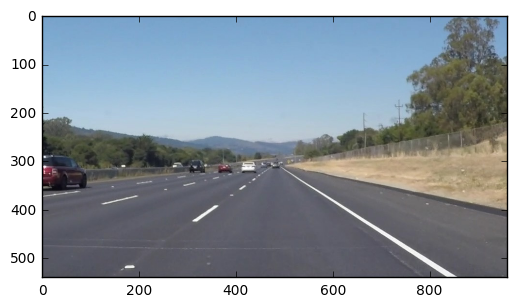

In [154]:
#Run this cell without changing anything first to watch the video
# cv2.startWindowThread()
# cv2.namedWindow('Lane-Finding')

image = mpimg.imread('solidWhiteRight.jpg')
 
fig = plt.figure()
im = plt.imshow(np.copy(image), animated=True)
   
ani = animation.FuncAnimation(fig, update_func, interval=50, blit=True)

cap = cv2.VideoCapture('solidWhiteRight.mp4')
fns = (grayscale, gaussian_noise, canny, region_of_interest, hough_lines, weighted_img)

def updatefig(*args):
#     while cap.isOpened():

    ret, image = cap.read()
    if image is not None:

        #### ADD YOUR CODE HERE #############
        # These are the tools you have from the lesson:#
        # 1) Color selection
        # 2) Mask the region of interest in the image
        # 3) Apply Canny Edge Detection
        # 4) Apply Hough Transform to find lines
        # These methods should be enough to do the job, 
        # but there are other methods out there,
        # feel free to explore and experiment!
        ####################################
        fns_args = (
            (), 
            (5,), 
            (50, 150), 
            (np.array([[(120,539),(440, 317), (520, 317), (900,539)]], dtype=np.int32),), 
            (np.copy(image)*0, 1, np.radians(1), 25, 20, 30),
            (np.copy(image),)
        )
        imgs = run_pipeline(fns, fns_args, image)

        result = imgs[-1]
        im.set_array(result)
        yield result

#         cv2.imshow('Lane-Finding', result)
#         plt.imshow(result)
#         clear_output(wait=True)
#     else:
#         break

#     k = cv2.waitKey(30) & 0xff
#     if k == 27 :
#         break

#     cap.release()
    # cv2.destroyAllWindows()

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=False)
# HTML(ani.to_html5_video())
# cap.release()

**Now try it again with a new video...  does your algorithm still work?  Or do you need to modify it?**

---

<figure>
 <img src="solidYellowLeft.jpg" width="480" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Now the scenario looks like this! </p> 
 </figcaption>
</figure>

---

In [ ]:
#run this cell to look at the above image in an interactive window
image = mpimg.imread('solidYellowLeft.jpg')
print('This image is: ',type(image), 'with dimesions:', image.shape)
plt.imshow(image)

In [ ]:
# cv2.startWindowThread()
# cv2.namedWindow('Lane-Finding')
cap = cv2.VideoCapture('solidYellowLeft.mp4')

while cap.isOpened():

    ret, image = cap.read()
    if image is not None:
        
        #### ADD YOUR CODE HERE #############
        # These are the tools you have from the lesson:#
        # 1) Color selection
        # 2) Mask the region of interest in the image
        # 3) Apply Canny Edge Detection
        # 4) Apply Hough Transform to find lines
        # These methods should be enough to do the job, 
        # but there are other methods out there,
        # feel free to explore and experiment!
        ####################################
#         fns_args = (
#             (), 
#             (5,), 
#             (50, 150), 
#             (np.array([[(120,539),(440, 320), (520, 320), (900,539)]], dtype=np.int32),), 
#             (np.copy(image)*0, 1, np.radians(1), 20, 10, 20),
#             (np.copy(image),)
#         )
#         result = run_pipeline(fns, fns_args, image)
#         cv2.imshow('Lane-Finding', result[-1])
        
    else:
        break
        
    k = cv2.waitKey(30) & 0xff
    if k == 27 :
        break

cap.release()
cv2.destroyAllWindows()

In [26]:
%pylab inline 
import cv2
from IPython.display import clear_output

Populating the interactive namespace from numpy and matplotlib


/Users/dluna/conda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['Slider', 'show', 'figure', 'source', 'Figure']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [33]:
?show

In [39]:
vid = cv2.VideoCapture("./solidWhiteRight.mp4")

# Put the code in try-except statements
# Catch the keyboard exception and 
# release the camera device and 
# continue with the rest of code.
try:
    while(True):
        # Capture frame-by-frame
        ret, frame = vid.read()
        if not ret:
            # Release the Video Device if ret is false
            vid.release()
            # Message to be displayed after releasing the device
            print("Released Video Resource")
            break
        # Convert the image from OpenCV BGR format to matplotlib RGB format
        # to display the image
#         frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Turn off the axis
        axis('off')
        # Title of the window
        title("Input Stream")
        # Display the frame
        imshow(frame)
        show()
        # Display the frame until new frame is available
        clear_output(wait=False)
except KeyboardInterrupt:
    # Release the Video Device
    vid.release()
    # Message to be displayed after releasing the device
    print("Released Video Resource")

Released Video Resource


## Try out Bokeh!

In [83]:
from bokeh.plotting import Figure, show, output_notebook
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, CustomJS, Slider
from bokeh.resources import INLINE
output_notebook(resources=INLINE)

Loading BokehJS ...

In [93]:
N, M, _ = image.shape
alpha_channel = np.empty((N,M,1), dtype=np.uint8)
alpha_channel[:] = 255
img_rgba = np.concatenate((image, alpha_channel), 2)
img_view = img_rgba.view(dtype=np.uint32).reshape((N, M))
print(img_view.shape)

(540, 960)


In [94]:
source = ColumnDataSource({'img': [img_view]})

In [105]:
p = Figure(x_range=(0,10), y_range=(0,10), webgl=True)

# must give a vector of images
p.image_rgba(image='img', x=0, y=0, dw=10, dh=10, source=source)

callback = CustomJS(args=dict(source=source), code="""
        t0 = performance.now()
        var data = source.get('data')
        var f = cb_obj.get('value')
        img = data['img'][0]
        var n = img.length
        for (var i = 0; i < n; i++){
            for (var j = 0; j < 10; j++) {
                img[i][j] += f
            }
        }
        console.log(performance.now() - t0)
        //source.trigger('change')
        
    """)
    
slider = Slider(start=0, end=255, value=0, step=1, title="alpha",
            callback=callback)

layout = column(slider, p)
show(layout)

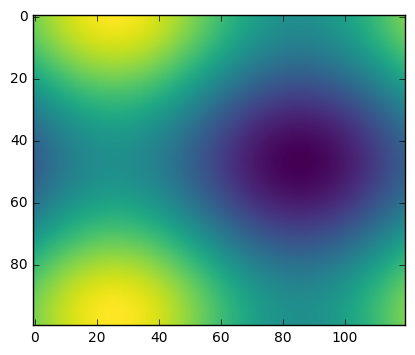

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), cmap=plt.get_cmap('viridis'), animated=True)

def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    yield im

ani = animation.FuncAnimation(fig, updatefig, frames=yrange(100), interval=300, blit=True)
# HTML(ani.to_html5_video())